In [1]:
from svm_basic import svm_basic
from svmMLiA import loadDataSet



In [2]:
def plot_fit(fit_line, datamatrix, labelmatrix):
    import matplotlib.pyplot as plt
    import numpy as np

    weights = fit_line
    print(len(weights))
    dataarray = np.asarray(datamatrix)
    n = dataarray.shape[0]

    # Keep track of the two classes in different arrays so they can be plotted later...
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelmatrix[i]) == 1:
            xcord1.append(dataarray[i, 0])
            ycord1.append(dataarray[i, 1])
        else:
            xcord2.append(dataarray[i, 0])
            ycord2.append(dataarray[i, 1])
    fig = plt.figure()

    # Plot the data as points with different colours
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    # Plot the best-fit line
    x = np.arange(-1.0, 6.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    print(y)
    ax.plot(x, y)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [4]:
def accuracy(labels, hypotheses):
    count = 0.0
    correct = 0.0

    for l, h in zip(labels, hypotheses):
        count += 1.0
        if l == h:
            correct += 1.0
    return correct / count

In [6]:
def print_confusion_matrix(labels, hypotheses):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    count = 1
    for l, h in zip(labels, hypotheses):
        count += 1
        if l == 1 and h == 1:
            tp += 1
        elif l == 1 and h == -1:
            tp += 1
        elif l == -1 and h == 1:
            fn += 1
        else:
            tn += 1
    print ('-----------------------------')
    print ('\tConfusion Matrix')
    print ('-----------------------------')
    print ('\t\tPredicted')
    print ('\tActual\tNO\tYES')
    print ('-----------------------------')
    print ('\tNO\t', tn, '\t', fp)
    print ('-----------------------------')
    print ('\tYES\t', fn, '\t', tp)
    print ('-----------------------------')

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 1
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 1
fullSet, iter: 0 i:5, pairs changed 2
fullSet, iter: 0 i:6, pairs changed 2
fullSet, iter: 0 i:7, pairs changed 3
fullSet, iter: 0 i:8, pairs changed 4
fullSet, iter: 0 i:9, pairs changed 4
fullSet, iter: 0 i:10, pairs changed 4
fullSet, iter: 0 i:11, pairs changed 5
fullSet, iter: 0 i:12, pairs changed 5
fullSet, iter: 0 i:13, pairs changed 5
fullSet, iter: 0 i:14, pairs changed 5
fullSet, iter: 0 i:15, pairs changed 5
fullSet, iter: 0 i:16, pairs changed 5
fullSet, iter: 0 i:17, pairs changed 5
fullSet, iter: 0 i:18, pairs changed 6
fullSet, iter: 0 i:19, pairs changed 6
fullSet, iter: 0 i:20, pairs changed 6
fullSet, iter: 0 i:21, pairs changed 6
j not moving enough
fullSet, iter: 0 i:22, pairs changed 6
fullSet, iter: 0 i:23, pairs changed 6
fullSet, iter: 0 i:24, pairs changed 6
fullSet, iter: 

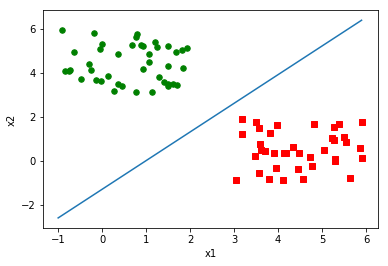

Accuracy:  1.0
-----------------------------
	Confusion Matrix
-----------------------------
		Predicted
	Actual	NO	YES
-----------------------------
	NO	 8 	 0
-----------------------------
	YES	 0 	 12
-----------------------------


In [7]:
clf = svm_basic(5000)
dataArr, labelArr = loadDataSet('linearly_separable.csv')
size = int(len(dataArr) * 0.8)
train_data = dataArr[:size]
train_label = labelArr[:size]
test_data = dataArr[size:]
test_label = labelArr[size:]
weightArray = clf.fit(train_data, train_label)
plot_fit(weightArray, train_data, train_label)
hyp = clf.predict(test_data)
print('Accuracy: ', accuracy(test_label, hyp))
print_confusion_matrix(test_label, hyp)
